In [1]:
import os
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
from pprint import pprint
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from scipy.stats import gaussian_kde
sys.path.append('./hand_tracker.py')

import hand_tracker as ht

In [2]:
selected_landmarks = {
    ht.CopyHandLandmark.WRIST: True,
    
    ht.CopyHandLandmark.THUMB_CMC: True,
    ht.CopyHandLandmark.THUMB_MCP: True,
    ht.CopyHandLandmark.THUMB_IP: True,
    ht.CopyHandLandmark.THUMB_TIP: True, 
    
    ht.CopyHandLandmark.INDEX_FINGER_MCP: True,
    ht.CopyHandLandmark.INDEX_FINGER_PIP: True,
    ht.CopyHandLandmark.INDEX_FINGER_DIP: True,
    ht.CopyHandLandmark.INDEX_FINGER_TIP: True, 
    
    ht.CopyHandLandmark.MIDDLE_FINGER_MCP: True,
    ht.CopyHandLandmark.MIDDLE_FINGER_PIP: True,
    ht.CopyHandLandmark.MIDDLE_FINGER_DIP: True,
    ht.CopyHandLandmark.MIDDLE_FINGER_TIP: True, 
    
    ht.CopyHandLandmark.RING_FINGER_MCP: True,
    ht.CopyHandLandmark.RING_FINGER_PIP: True,
    ht.CopyHandLandmark.RING_FINGER_DIP: True,
    ht.CopyHandLandmark.RING_FINGER_TIP: True, 
    
    ht.CopyHandLandmark.PINKY_MCP: True,
    ht.CopyHandLandmark.PINKY_PIP: True,
    ht.CopyHandLandmark.PINKY_DIP: True,
    ht.CopyHandLandmark.PINKY_TIP: True 
}

VIDEO_DIR= "./video_frames/non_stroke_frames"

output_csv = "./non_stroke_hand_features.csv"
if os.path.exists(output_csv):
    print(f"Already exists bruh")
else:
    # Call the extract_hand_features function if the file does not exist
    ht.extract_hand_features(VIDEO_DIR, selected_landmarks, output_csv=output_csv)

Already exists bruh


In [3]:
# Load the CSV data
df = pd.read_csv(output_csv)

In [4]:
display(df.head())
df = df.dropna()
print(df.columns)

,rh_WRIST,rh_THUMB_CMC,rh_THUMB_MCP,rh_THUMB_IP,rh_THUMB_TIP,rh_INDEX_FINGER_MCP,rh_INDEX_FINGER_PIP,rh_INDEX_FINGER_DIP,rh_INDEX_FINGER_TIP,rh_MIDDLE_FINGER_MCP,...,lh_MIDDLE_FINGER_TIP,lh_RING_FINGER_MCP,lh_RING_FINGER_PIP,lh_RING_FINGER_DIP,lh_RING_FINGER_TIP,lh_PINKY_MCP,lh_PINKY_PIP,lh_PINKY_DIP,lh_PINKY_TIP,frame
0,"(473, 349)","(497, 268)","(552, 210)","(613, 187)","(664, 190)","(553, 228)","(633, 204)","(668, 191)","(693, 181)","(568, 275)",...,"(730, 459)","(838, 392)","(797, 397)","(765, 447)","(751, 483)","(866, 422)","(828, 426)","(797, 456)","(782, 477)",00000.jpg
1,"(480, 344)","(505, 261)","(564, 201)","(627, 179)","(681, 187)","(554, 224)","(635, 200)","(669, 190)","(695, 186)","(571, 273)",...,"(733, 463)","(839, 390)","(796, 394)","(767, 445)","(755, 481)","(868, 420)","(832, 422)","(801, 450)","(784, 472)",00001.jpg
2,"(481, 339)","(508, 256)","(568, 199)","(634, 178)","(687, 184)","(561, 223)","(649, 200)","(674, 191)","(688, 190)","(575, 271)",...,"(732, 461)","(841, 388)","(798, 396)","(769, 447)","(755, 481)","(870, 419)","(835, 420)","(806, 449)","(789, 469)",00002.jpg
3,"(488, 332)","(510, 257)","(567, 199)","(628, 178)","(677, 183)","(563, 217)","(641, 194)","(681, 183)","(712, 180)","(577, 265)",...,"(733, 457)","(842, 382)","(797, 388)","(770, 440)","(758, 475)","(871, 412)","(833, 416)","(804, 446)","(788, 467)",00003.jpg
4,"(488, 331)","(511, 255)","(568, 202)","(629, 184)","(678, 188)","(563, 214)","(644, 188)","(686, 179)","(719, 178)","(579, 262)",...,"(735, 449)","(841, 375)","(800, 384)","(772, 435)","(761, 470)","(871, 404)","(835, 408)","(809, 439)","(797, 461)",00004.jpg


Index(['rh_WRIST', 'rh_THUMB_CMC', 'rh_THUMB_MCP', 'rh_THUMB_IP',
       'rh_THUMB_TIP', 'rh_INDEX_FINGER_MCP', 'rh_INDEX_FINGER_PIP',
       'rh_INDEX_FINGER_DIP', 'rh_INDEX_FINGER_TIP', 'rh_MIDDLE_FINGER_MCP',
       'rh_MIDDLE_FINGER_PIP', 'rh_MIDDLE_FINGER_DIP', 'rh_MIDDLE_FINGER_TIP',
       'rh_RING_FINGER_MCP', 'rh_RING_FINGER_PIP', 'rh_RING_FINGER_DIP',
       'rh_RING_FINGER_TIP', 'rh_PINKY_MCP', 'rh_PINKY_PIP', 'rh_PINKY_DIP',
       'rh_PINKY_TIP', 'lh_WRIST', 'lh_THUMB_CMC', 'lh_THUMB_MCP',
       'lh_THUMB_IP', 'lh_THUMB_TIP', 'lh_INDEX_FINGER_MCP',
       'lh_INDEX_FINGER_PIP', 'lh_INDEX_FINGER_DIP', 'lh_INDEX_FINGER_TIP',
       'lh_MIDDLE_FINGER_MCP', 'lh_MIDDLE_FINGER_PIP', 'lh_MIDDLE_FINGER_DIP',
       'lh_MIDDLE_FINGER_TIP', 'lh_RING_FINGER_MCP', 'lh_RING_FINGER_PIP',
       'lh_RING_FINGER_DIP', 'lh_RING_FINGER_TIP', 'lh_PINKY_MCP',
       'lh_PINKY_PIP', 'lh_PINKY_DIP', 'lh_PINKY_TIP', 'frame'],
      dtype='object')


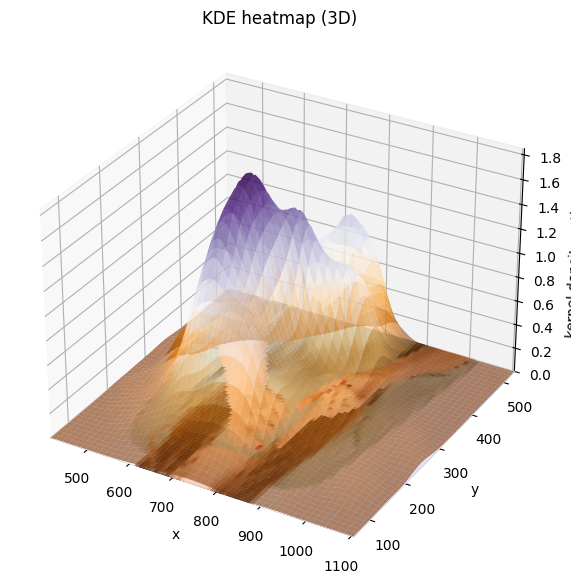

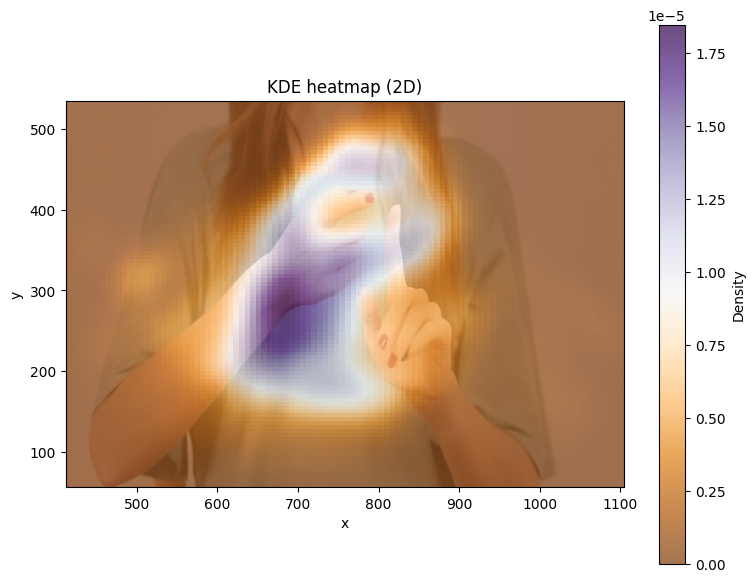

In [5]:
ht.heatmap_kde(df.copy())

### Sanity check: Verifying coordinate distribution of hand landmarks separately

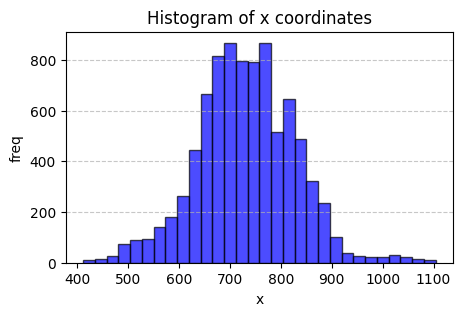

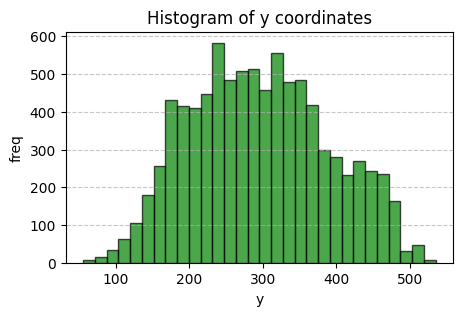

In [6]:
def converter_func1(val):
    if isinstance(val, str):  # Check if the value is a string
        coord_tuple = tuple(map(int, val.strip("()").split(",")))
        return np.array(coord_tuple)

all_coordinates = []
for col in df.columns:
    if col != "frame":
        df[col] = df[col].apply(converter_func1)  # Apply conversion function
        all_coordinates.extend(df[col].dropna().values)

coordinates_2d = np.array(all_coordinates)
coord_2d = coordinates_2d.T
x_coords, y_coords = coord_2d[0], coord_2d[1]

plt.figure(figsize=(10//2, 6//2))
plt.hist(x_coords, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of x coordinates')
plt.xlabel('x')
plt.ylabel('freq')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot histogram for y-coordinates
plt.figure(figsize=(10//2, 6//2))
plt.hist(y_coords, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Histogram of y coordinates')
plt.xlabel('y')
plt.ylabel('freq')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()